Question 3: [Regression] [30 pts] Use Keras’ built-in Boston House
Pricing dataset (from keras.datasets import boston_housing) to
perform regression and predict house prices. Use k-fold cross
validation and show loss/MAE plots by epoch. 

	
- Compare the results when using no regularizer, L2 regularizer
and Dropout as a regularization method.

	
- Try a different loss function and report the difference.


In [1]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM, Reshape
from keras.regularizers import l2,l1, l1_l2

Using TensorFlow backend.


In [2]:
from sklearn.model_selection import KFold
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
(X, Y), _ = boston_housing.load_data(test_split=0)

In [4]:
def make_plot(histories_per_fold):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    ax = plt.axes()
    plt.ylabel('loss')
    plt.xlabel('mae')
    plt.title('mae vs loss, epoch by epoch')
    accs = [sum(x)/len(histories_per_fold) for x in zip(*[history.history['mean_absolute_error'] for history in histories_per_fold])]
    losses = [sum(x)/len(histories_per_fold) for x in zip(*[history.history['loss'] for history in histories_per_fold])]
    val_accs = [sum(x)/len(histories_per_fold) for x in zip(*[history.history['val_mean_absolute_error'] for history in histories_per_fold])]
    val_losses = [sum(x)/len(histories_per_fold) for x in zip(*[history.history['val_loss'] for history in histories_per_fold])]
    plt.plot(accs,losses)    
    plt.plot(val_accs, val_losses)
    plt.show()
    
# def make_plot(histories_per_fold):
#     plt.style.use('seaborn-whitegrid')
#     fig = plt.figure()
#     ax = plt.axes()
#     plt.ylabel('loss')
#     plt.xlabel('mae')
#     plt.title('mae vs loss, epoch by epoch')
#     for history in histories_per_fold:
#         plt.plot(history.history['mean_absolute_error'],history.history['loss'])
#     plt.show()

In [5]:
# no regularization
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
histories_per_fold = []
# split training and validation sets
for i, (train, test) in enumerate(kfold.split(X, Y)):
    print("Fold no:{}".format(i))
    X_train = X[train]
    X_test = X[test]
    Y_test = (Y[test])
    Y_train = (Y[train])
        
    # make the model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])

    
    # Train the model
    history = model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=1, validation_data=(X_test,Y_test))
    histories_per_fold.append(history)


Fold no:0
Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 0s 896us/step - loss: 480.6670 - mean_absolute_error: 19.9284 - val_loss: 312.7756 - val_mean_absolute_error: 15.0711
Epoch 2/100
404/404 [==============================] - 0s 89us/step - loss: 253.1434 - mean_absolute_error: 13.2413 - val_loss: 181.2555 - val_mean_absolute_error: 10.3831
Epoch 3/100
404/404 [==============================] - 0s 98us/step - loss: 146.6897 - mean_absolute_error: 9.1777 - val_loss: 118.8106 - val_mean_absolute_error: 7.6214
Epoch 4/100
404/404 [==============================] - 0s 99us/step - loss: 104.9889 - mean_absolute_error: 7.4396 - val_loss: 103.0429 - val_mean_absolute_error: 7.0244
Epoch 5/100
404/404 [==============================] - 0s 95us/step - loss: 93.0712 - mean_absolute_error: 6.9059 - val_loss: 95.4726 - val_mean_absolute_error: 6.8462
Epoch 6/100
404/404 [==============================] - 0s 103us/step - loss: 84.0392 - mean

Epoch 49/100
404/404 [==============================] - 0s 60us/step - loss: 48.4566 - mean_absolute_error: 5.0441 - val_loss: 60.8038 - val_mean_absolute_error: 6.0576
Epoch 50/100
404/404 [==============================] - 0s 115us/step - loss: 45.3825 - mean_absolute_error: 4.8982 - val_loss: 56.8107 - val_mean_absolute_error: 5.4514
Epoch 51/100
404/404 [==============================] - 0s 63us/step - loss: 47.1261 - mean_absolute_error: 4.9875 - val_loss: 57.7233 - val_mean_absolute_error: 5.1023
Epoch 52/100
404/404 [==============================] - 0s 69us/step - loss: 44.9394 - mean_absolute_error: 4.6982 - val_loss: 58.2349 - val_mean_absolute_error: 5.1111
Epoch 53/100
404/404 [==============================] - 0s 67us/step - loss: 44.9366 - mean_absolute_error: 4.7351 - val_loss: 55.4202 - val_mean_absolute_error: 5.0852
Epoch 54/100
404/404 [==============================] - 0s 73us/step - loss: 43.9510 - mean_absolute_error: 4.6869 - val_loss: 55.8715 - val_mean_absolute

404/404 [==============================] - 0s 76us/step - loss: 33.8527 - mean_absolute_error: 4.1919 - val_loss: 42.3884 - val_mean_absolute_error: 4.6801
Epoch 98/100
404/404 [==============================] - 0s 70us/step - loss: 34.4174 - mean_absolute_error: 4.2325 - val_loss: 43.2895 - val_mean_absolute_error: 4.5585
Epoch 99/100
404/404 [==============================] - 0s 61us/step - loss: 34.5091 - mean_absolute_error: 4.2471 - val_loss: 42.2381 - val_mean_absolute_error: 4.9010
Epoch 100/100
404/404 [==============================] - 0s 49us/step - loss: 35.4876 - mean_absolute_error: 4.3035 - val_loss: 48.8012 - val_mean_absolute_error: 4.7113
Fold no:1
Train on 405 samples, validate on 101 samples
Epoch 1/100
405/405 [==============================] - 0s 1ms/step - loss: 383.5671 - mean_absolute_error: 16.5921 - val_loss: 222.9407 - val_mean_absolute_error: 12.3362
Epoch 2/100
405/405 [==============================] - 0s 119us/step - loss: 254.6111 - mean_absolute_error: 

405/405 [==============================] - 0s 76us/step - loss: 54.6654 - mean_absolute_error: 5.3239 - val_loss: 56.1054 - val_mean_absolute_error: 5.6406
Epoch 46/100
405/405 [==============================] - 0s 42us/step - loss: 55.1434 - mean_absolute_error: 5.4289 - val_loss: 51.2577 - val_mean_absolute_error: 4.6921
Epoch 47/100
405/405 [==============================] - 0s 47us/step - loss: 53.6441 - mean_absolute_error: 5.2444 - val_loss: 51.6161 - val_mean_absolute_error: 4.9841
Epoch 48/100
405/405 [==============================] - 0s 46us/step - loss: 54.7822 - mean_absolute_error: 5.3872 - val_loss: 50.7358 - val_mean_absolute_error: 4.6615
Epoch 49/100
405/405 [==============================] - 0s 57us/step - loss: 53.2221 - mean_absolute_error: 5.2420 - val_loss: 50.5628 - val_mean_absolute_error: 4.8105
Epoch 50/100
405/405 [==============================] - 0s 38us/step - loss: 53.0790 - mean_absolute_error: 5.2139 - val_loss: 50.1196 - val_mean_absolute_error: 4.6074

405/405 [==============================] - 0s 88us/step - loss: 40.5095 - mean_absolute_error: 4.6130 - val_loss: 42.3532 - val_mean_absolute_error: 4.5440
Epoch 94/100
405/405 [==============================] - 0s 77us/step - loss: 38.4315 - mean_absolute_error: 4.5411 - val_loss: 41.4829 - val_mean_absolute_error: 4.2701
Epoch 95/100
405/405 [==============================] - 0s 62us/step - loss: 39.2475 - mean_absolute_error: 4.4675 - val_loss: 42.1022 - val_mean_absolute_error: 4.5516
Epoch 96/100
405/405 [==============================] - 0s 48us/step - loss: 38.0685 - mean_absolute_error: 4.4533 - val_loss: 41.4322 - val_mean_absolute_error: 4.3617
Epoch 97/100
405/405 [==============================] - 0s 70us/step - loss: 39.3060 - mean_absolute_error: 4.4759 - val_loss: 43.1648 - val_mean_absolute_error: 4.7915
Epoch 98/100
405/405 [==============================] - 0s 55us/step - loss: 38.5446 - mean_absolute_error: 4.5343 - val_loss: 42.7322 - val_mean_absolute_error: 4.0420

Epoch 41/100
405/405 [==============================] - 0s 75us/step - loss: 65.2273 - mean_absolute_error: 5.9025 - val_loss: 73.6275 - val_mean_absolute_error: 6.0196
Epoch 42/100
405/405 [==============================] - 0s 61us/step - loss: 64.9203 - mean_absolute_error: 5.8560 - val_loss: 73.0117 - val_mean_absolute_error: 5.8927
Epoch 43/100
405/405 [==============================] - 0s 60us/step - loss: 64.1416 - mean_absolute_error: 5.7279 - val_loss: 73.7217 - val_mean_absolute_error: 6.1907
Epoch 44/100
405/405 [==============================] - 0s 54us/step - loss: 63.6604 - mean_absolute_error: 5.8692 - val_loss: 71.8890 - val_mean_absolute_error: 5.8873
Epoch 45/100
405/405 [==============================] - 0s 52us/step - loss: 63.6793 - mean_absolute_error: 5.7230 - val_loss: 71.5127 - val_mean_absolute_error: 5.8099
Epoch 46/100
405/405 [==============================] - 0s 47us/step - loss: 62.5862 - mean_absolute_error: 5.6604 - val_loss: 71.1952 - val_mean_absolute_

405/405 [==============================] - 0s 56us/step - loss: 53.6066 - mean_absolute_error: 5.1398 - val_loss: 62.8686 - val_mean_absolute_error: 5.5397
Epoch 90/100
405/405 [==============================] - 0s 92us/step - loss: 53.3802 - mean_absolute_error: 5.2436 - val_loss: 62.6383 - val_mean_absolute_error: 5.5215
Epoch 91/100
405/405 [==============================] - 0s 56us/step - loss: 53.6736 - mean_absolute_error: 5.2671 - val_loss: 62.3694 - val_mean_absolute_error: 5.5021
Epoch 92/100
405/405 [==============================] - 0s 54us/step - loss: 53.1601 - mean_absolute_error: 5.1750 - val_loss: 63.6820 - val_mean_absolute_error: 5.7348
Epoch 93/100
405/405 [==============================] - 0s 53us/step - loss: 53.5511 - mean_absolute_error: 5.2917 - val_loss: 61.9874 - val_mean_absolute_error: 5.4917
Epoch 94/100
405/405 [==============================] - 0s 49us/step - loss: 52.9731 - mean_absolute_error: 5.2137 - val_loss: 62.0138 - val_mean_absolute_error: 5.2681

405/405 [==============================] - 0s 75us/step - loss: 63.1917 - mean_absolute_error: 5.6127 - val_loss: 49.2177 - val_mean_absolute_error: 5.4546
Epoch 38/100
405/405 [==============================] - 0s 78us/step - loss: 62.6144 - mean_absolute_error: 5.6103 - val_loss: 49.4591 - val_mean_absolute_error: 5.2872
Epoch 39/100
405/405 [==============================] - 0s 59us/step - loss: 62.1815 - mean_absolute_error: 5.6099 - val_loss: 56.6061 - val_mean_absolute_error: 6.0918
Epoch 40/100
405/405 [==============================] - 0s 58us/step - loss: 61.4372 - mean_absolute_error: 5.6817 - val_loss: 48.2850 - val_mean_absolute_error: 5.2872
Epoch 41/100
405/405 [==============================] - 0s 52us/step - loss: 62.4450 - mean_absolute_error: 5.4954 - val_loss: 47.9862 - val_mean_absolute_error: 5.3012
Epoch 42/100
405/405 [==============================] - 0s 60us/step - loss: 60.5112 - mean_absolute_error: 5.5327 - val_loss: 52.5344 - val_mean_absolute_error: 5.1922

405/405 [==============================] - 0s 98us/step - loss: 45.1437 - mean_absolute_error: 4.6577 - val_loss: 37.8163 - val_mean_absolute_error: 4.4844
Epoch 86/100
405/405 [==============================] - 0s 63us/step - loss: 46.9557 - mean_absolute_error: 4.6842 - val_loss: 37.0072 - val_mean_absolute_error: 4.7096
Epoch 87/100
405/405 [==============================] - 0s 55us/step - loss: 44.7673 - mean_absolute_error: 4.6350 - val_loss: 36.3449 - val_mean_absolute_error: 4.4729
Epoch 88/100
405/405 [==============================] - 0s 56us/step - loss: 44.0215 - mean_absolute_error: 4.5576 - val_loss: 36.2983 - val_mean_absolute_error: 4.6470
Epoch 89/100
405/405 [==============================] - 0s 52us/step - loss: 45.5062 - mean_absolute_error: 4.6653 - val_loss: 35.4330 - val_mean_absolute_error: 4.4938
Epoch 90/100
405/405 [==============================] - 0s 62us/step - loss: 45.3343 - mean_absolute_error: 4.6848 - val_loss: 39.0930 - val_mean_absolute_error: 4.9712

405/405 [==============================] - 0s 47us/step - loss: 55.4062 - mean_absolute_error: 5.3169 - val_loss: 67.4406 - val_mean_absolute_error: 5.4923
Epoch 34/100
405/405 [==============================] - 0s 63us/step - loss: 54.4280 - mean_absolute_error: 5.0318 - val_loss: 55.6853 - val_mean_absolute_error: 5.6045
Epoch 35/100
405/405 [==============================] - 0s 88us/step - loss: 55.6053 - mean_absolute_error: 5.2731 - val_loss: 55.7695 - val_mean_absolute_error: 5.2611
Epoch 36/100
405/405 [==============================] - 0s 77us/step - loss: 55.6474 - mean_absolute_error: 5.2169 - val_loss: 60.3154 - val_mean_absolute_error: 5.2522
Epoch 37/100
405/405 [==============================] - 0s 67us/step - loss: 53.8493 - mean_absolute_error: 5.0142 - val_loss: 55.4705 - val_mean_absolute_error: 5.2124
Epoch 38/100
405/405 [==============================] - 0s 68us/step - loss: 54.6754 - mean_absolute_error: 5.1334 - val_loss: 53.9459 - val_mean_absolute_error: 5.3979

405/405 [==============================] - 0s 132us/step - loss: 38.9046 - mean_absolute_error: 4.4749 - val_loss: 43.9025 - val_mean_absolute_error: 5.1427
Epoch 82/100
405/405 [==============================] - 0s 161us/step - loss: 41.0724 - mean_absolute_error: 4.6431 - val_loss: 41.4499 - val_mean_absolute_error: 4.3299
Epoch 83/100
405/405 [==============================] - 0s 65us/step - loss: 40.1501 - mean_absolute_error: 4.4884 - val_loss: 40.5362 - val_mean_absolute_error: 4.6596
Epoch 84/100
405/405 [==============================] - 0s 55us/step - loss: 38.4035 - mean_absolute_error: 4.4481 - val_loss: 43.6641 - val_mean_absolute_error: 4.3902
Epoch 85/100
405/405 [==============================] - 0s 66us/step - loss: 40.9321 - mean_absolute_error: 4.4761 - val_loss: 48.0428 - val_mean_absolute_error: 4.5965
Epoch 86/100
405/405 [==============================] - 0s 70us/step - loss: 40.4027 - mean_absolute_error: 4.4796 - val_loss: 50.0265 - val_mean_absolute_error: 4.71

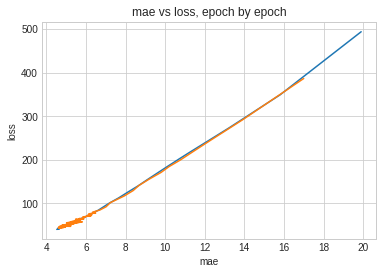

In [6]:
make_plot(histories_per_fold)

mean_absolute_error drops up to 4.3 but average remains 4.940942 thus overfitting. stdev is not large though

In [7]:
# just dropout
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
histories_per_fold = []
# split training and validation sets
for i, (train, test) in enumerate(kfold.split(X, Y)):
    print("Fold no:{}".format(i))
    X_train = X[train]
    X_test = X[test]
    Y_test = (Y[test])
    Y_train = (Y[train])
        
    # make the model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])

    
    # Train the model
    history = model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=1, validation_data=(X_test,Y_test))
    histories_per_fold.append(history)
    

Fold no:0
Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 1s 1ms/step - loss: 505.9229 - mean_absolute_error: 20.4143 - val_loss: 353.5000 - val_mean_absolute_error: 16.2024
Epoch 2/100
404/404 [==============================] - 0s 79us/step - loss: 323.0072 - mean_absolute_error: 14.9732 - val_loss: 230.2254 - val_mean_absolute_error: 12.1793
Epoch 3/100
404/404 [==============================] - 0s 82us/step - loss: 227.6081 - mean_absolute_error: 11.9273 - val_loss: 163.5075 - val_mean_absolute_error: 9.5981
Epoch 4/100
404/404 [==============================] - 0s 114us/step - loss: 170.0821 - mean_absolute_error: 9.8934 - val_loss: 124.8374 - val_mean_absolute_error: 7.8800
Epoch 5/100
404/404 [==============================] - 0s 150us/step - loss: 189.4121 - mean_absolute_error: 10.5614 - val_loss: 112.5108 - val_mean_absolute_error: 7.4371
Epoch 6/100
404/404 [==============================] - 0s 111us/step - loss: 177.0608 -

404/404 [==============================] - 0s 96us/step - loss: 118.0309 - mean_absolute_error: 8.0543 - val_loss: 79.6914 - val_mean_absolute_error: 5.6654
Epoch 49/100
404/404 [==============================] - 0s 74us/step - loss: 104.7363 - mean_absolute_error: 7.7050 - val_loss: 74.9611 - val_mean_absolute_error: 5.5038
Epoch 50/100
404/404 [==============================] - 0s 77us/step - loss: 109.7358 - mean_absolute_error: 7.8221 - val_loss: 74.8750 - val_mean_absolute_error: 5.5000
Epoch 51/100
404/404 [==============================] - 0s 120us/step - loss: 108.0147 - mean_absolute_error: 7.9267 - val_loss: 70.4872 - val_mean_absolute_error: 5.4144
Epoch 52/100
404/404 [==============================] - 0s 68us/step - loss: 110.2602 - mean_absolute_error: 7.7339 - val_loss: 69.4221 - val_mean_absolute_error: 5.4207
Epoch 53/100
404/404 [==============================] - 0s 66us/step - loss: 100.5149 - mean_absolute_error: 7.6372 - val_loss: 66.0832 - val_mean_absolute_error:

404/404 [==============================] - 0s 60us/step - loss: 101.3374 - mean_absolute_error: 7.4913 - val_loss: 56.4467 - val_mean_absolute_error: 4.7502
Epoch 97/100
404/404 [==============================] - 0s 90us/step - loss: 101.4183 - mean_absolute_error: 7.4492 - val_loss: 57.7869 - val_mean_absolute_error: 4.7640
Epoch 98/100
404/404 [==============================] - 0s 63us/step - loss: 106.4049 - mean_absolute_error: 7.6123 - val_loss: 53.0243 - val_mean_absolute_error: 5.1232
Epoch 99/100
404/404 [==============================] - 0s 88us/step - loss: 95.9857 - mean_absolute_error: 7.5288 - val_loss: 53.1694 - val_mean_absolute_error: 4.8737
Epoch 100/100
404/404 [==============================] - 0s 86us/step - loss: 108.6137 - mean_absolute_error: 7.6327 - val_loss: 54.5830 - val_mean_absolute_error: 4.7539
Fold no:1
Train on 405 samples, validate on 101 samples
Epoch 1/100
405/405 [==============================] - 1s 1ms/step - loss: 561.5342 - mean_absolute_error: 

Epoch 44/100
405/405 [==============================] - 0s 81us/step - loss: 99.8869 - mean_absolute_error: 7.4591 - val_loss: 49.8641 - val_mean_absolute_error: 4.3012
Epoch 45/100
405/405 [==============================] - 0s 54us/step - loss: 94.6175 - mean_absolute_error: 7.2875 - val_loss: 49.2841 - val_mean_absolute_error: 4.3063
Epoch 46/100
405/405 [==============================] - 0s 113us/step - loss: 93.2340 - mean_absolute_error: 7.3257 - val_loss: 47.6315 - val_mean_absolute_error: 4.3981
Epoch 47/100
405/405 [==============================] - 0s 78us/step - loss: 109.5978 - mean_absolute_error: 7.6339 - val_loss: 60.3924 - val_mean_absolute_error: 4.7952
Epoch 48/100
405/405 [==============================] - 0s 62us/step - loss: 98.8883 - mean_absolute_error: 7.4146 - val_loss: 51.5078 - val_mean_absolute_error: 4.3208
Epoch 49/100
405/405 [==============================] - 0s 61us/step - loss: 99.2784 - mean_absolute_error: 7.3432 - val_loss: 58.4580 - val_mean_absolut

405/405 [==============================] - 0s 85us/step - loss: 100.6613 - mean_absolute_error: 7.5494 - val_loss: 44.5174 - val_mean_absolute_error: 4.1179
Epoch 93/100
405/405 [==============================] - 0s 67us/step - loss: 90.0406 - mean_absolute_error: 7.1525 - val_loss: 44.2264 - val_mean_absolute_error: 4.1006
Epoch 94/100
405/405 [==============================] - 0s 66us/step - loss: 75.5261 - mean_absolute_error: 6.5217 - val_loss: 59.8110 - val_mean_absolute_error: 5.1209
Epoch 95/100
405/405 [==============================] - 0s 77us/step - loss: 91.6748 - mean_absolute_error: 7.2681 - val_loss: 54.0742 - val_mean_absolute_error: 4.7155
Epoch 96/100
405/405 [==============================] - 0s 55us/step - loss: 76.2755 - mean_absolute_error: 6.4674 - val_loss: 39.8681 - val_mean_absolute_error: 4.0021
Epoch 97/100
405/405 [==============================] - 0s 68us/step - loss: 90.1729 - mean_absolute_error: 7.3856 - val_loss: 47.1491 - val_mean_absolute_error: 4.259

Epoch 40/100
405/405 [==============================] - 0s 81us/step - loss: 126.7569 - mean_absolute_error: 8.6387 - val_loss: 73.9880 - val_mean_absolute_error: 5.5008
Epoch 41/100
405/405 [==============================] - 0s 77us/step - loss: 117.1089 - mean_absolute_error: 8.1233 - val_loss: 64.2468 - val_mean_absolute_error: 5.2053
Epoch 42/100
405/405 [==============================] - 0s 59us/step - loss: 144.5521 - mean_absolute_error: 9.2099 - val_loss: 69.7320 - val_mean_absolute_error: 5.3122
Epoch 43/100
405/405 [==============================] - 0s 50us/step - loss: 139.9171 - mean_absolute_error: 9.0254 - val_loss: 77.1356 - val_mean_absolute_error: 5.6540
Epoch 44/100
405/405 [==============================] - 0s 82us/step - loss: 116.8619 - mean_absolute_error: 8.3835 - val_loss: 70.9878 - val_mean_absolute_error: 5.3458
Epoch 45/100
405/405 [==============================] - 0s 65us/step - loss: 136.2331 - mean_absolute_error: 8.6986 - val_loss: 65.1406 - val_mean_abs

405/405 [==============================] - 0s 104us/step - loss: 126.2723 - mean_absolute_error: 8.0675 - val_loss: 62.1665 - val_mean_absolute_error: 4.9603
Epoch 89/100
405/405 [==============================] - 0s 49us/step - loss: 115.6442 - mean_absolute_error: 8.0348 - val_loss: 63.8286 - val_mean_absolute_error: 5.0582
Epoch 90/100
405/405 [==============================] - 0s 134us/step - loss: 117.8476 - mean_absolute_error: 8.2887 - val_loss: 52.6442 - val_mean_absolute_error: 4.6178
Epoch 91/100
405/405 [==============================] - 0s 106us/step - loss: 115.9722 - mean_absolute_error: 8.1608 - val_loss: 62.2065 - val_mean_absolute_error: 4.9628
Epoch 92/100
405/405 [==============================] - 0s 127us/step - loss: 114.7895 - mean_absolute_error: 8.0341 - val_loss: 61.7042 - val_mean_absolute_error: 4.9321
Epoch 93/100
405/405 [==============================] - 0s 132us/step - loss: 122.3653 - mean_absolute_error: 8.4506 - val_loss: 57.6834 - val_mean_absolute_er

Epoch 36/100
405/405 [==============================] - 0s 77us/step - loss: 105.4862 - mean_absolute_error: 7.9294 - val_loss: 50.5075 - val_mean_absolute_error: 5.0407
Epoch 37/100
405/405 [==============================] - 0s 140us/step - loss: 120.1149 - mean_absolute_error: 8.2341 - val_loss: 50.5852 - val_mean_absolute_error: 5.0032
Epoch 38/100
405/405 [==============================] - 0s 149us/step - loss: 121.6280 - mean_absolute_error: 8.5703 - val_loss: 48.5311 - val_mean_absolute_error: 4.9769
Epoch 39/100
405/405 [==============================] - 0s 112us/step - loss: 116.1738 - mean_absolute_error: 8.0226 - val_loss: 54.7115 - val_mean_absolute_error: 5.0532
Epoch 40/100
405/405 [==============================] - 0s 161us/step - loss: 109.8160 - mean_absolute_error: 7.9901 - val_loss: 59.0536 - val_mean_absolute_error: 5.2642
Epoch 41/100
405/405 [==============================] - 0s 123us/step - loss: 114.0454 - mean_absolute_error: 7.9513 - val_loss: 52.5270 - val_mea

405/405 [==============================] - 0s 104us/step - loss: 105.0954 - mean_absolute_error: 7.7905 - val_loss: 39.6019 - val_mean_absolute_error: 4.4547
Epoch 85/100
405/405 [==============================] - 0s 85us/step - loss: 84.9956 - mean_absolute_error: 7.1287 - val_loss: 40.9904 - val_mean_absolute_error: 4.4624
Epoch 86/100
405/405 [==============================] - 0s 85us/step - loss: 98.0158 - mean_absolute_error: 7.4283 - val_loss: 45.6628 - val_mean_absolute_error: 4.6813
Epoch 87/100
405/405 [==============================] - 0s 65us/step - loss: 104.0505 - mean_absolute_error: 7.3408 - val_loss: 41.0723 - val_mean_absolute_error: 4.4498
Epoch 88/100
405/405 [==============================] - 0s 60us/step - loss: 95.2122 - mean_absolute_error: 7.3708 - val_loss: 38.0731 - val_mean_absolute_error: 4.4319
Epoch 89/100
405/405 [==============================] - 0s 75us/step - loss: 107.8013 - mean_absolute_error: 7.7073 - val_loss: 41.3884 - val_mean_absolute_error: 4.

Epoch 32/100
405/405 [==============================] - 0s 83us/step - loss: 115.4252 - mean_absolute_error: 7.9253 - val_loss: 57.4740 - val_mean_absolute_error: 5.2735
Epoch 33/100
405/405 [==============================] - 0s 84us/step - loss: 113.0085 - mean_absolute_error: 8.0682 - val_loss: 60.4980 - val_mean_absolute_error: 5.3175
Epoch 34/100
405/405 [==============================] - 0s 90us/step - loss: 105.2156 - mean_absolute_error: 7.7616 - val_loss: 59.0581 - val_mean_absolute_error: 5.2598
Epoch 35/100
405/405 [==============================] - 0s 73us/step - loss: 99.5218 - mean_absolute_error: 7.5197 - val_loss: 63.1512 - val_mean_absolute_error: 5.3758
Epoch 36/100
405/405 [==============================] - 0s 68us/step - loss: 97.5021 - mean_absolute_error: 7.5571 - val_loss: 60.7251 - val_mean_absolute_error: 5.2778
Epoch 37/100
405/405 [==============================] - 0s 80us/step - loss: 117.2390 - mean_absolute_error: 7.7866 - val_loss: 60.2713 - val_mean_absol

405/405 [==============================] - 0s 112us/step - loss: 93.6811 - mean_absolute_error: 7.2082 - val_loss: 49.1943 - val_mean_absolute_error: 4.6519
Epoch 81/100
405/405 [==============================] - 0s 59us/step - loss: 105.0908 - mean_absolute_error: 7.6282 - val_loss: 43.8156 - val_mean_absolute_error: 4.4629
Epoch 82/100
405/405 [==============================] - 0s 69us/step - loss: 97.4114 - mean_absolute_error: 7.2842 - val_loss: 41.6012 - val_mean_absolute_error: 4.5264
Epoch 83/100
405/405 [==============================] - 0s 69us/step - loss: 98.8283 - mean_absolute_error: 7.3105 - val_loss: 42.2237 - val_mean_absolute_error: 4.8860
Epoch 84/100
405/405 [==============================] - 0s 73us/step - loss: 102.9468 - mean_absolute_error: 7.5345 - val_loss: 45.1466 - val_mean_absolute_error: 4.5025
Epoch 85/100
405/405 [==============================] - 0s 79us/step - loss: 97.5769 - mean_absolute_error: 7.3618 - val_loss: 41.7605 - val_mean_absolute_error: 4.4

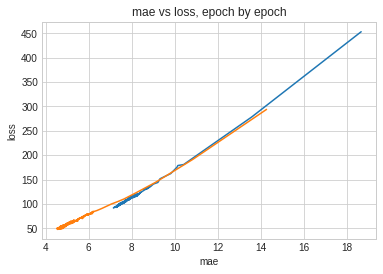

In [8]:
make_plot(histories_per_fold)

I have tried various levels of dropout but I am already using a small network since the data 
is not very complex or large. So dropout did not make any significant improvement. 

In [9]:

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
histories_per_fold = []
# split training and validation sets
for i, (train, test) in enumerate(kfold.split(X, Y)):
    print("Fold no:{}".format(i))
    X_train = X[train]
    X_test = X[test]
    Y_test = (Y[test])
    Y_train = (Y[train])
        
    # make the model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(6, kernel_initializer='normal', activation='relu',  kernel_regularizer=l2(0.01)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])

    
    # Train the model
    history = model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=1, validation_data=(X_test,Y_test))
    histories_per_fold.append(history)
    

Fold no:0
Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 1s 1ms/step - loss: 587.2714 - mean_absolute_error: 22.4831 - val_loss: 546.0859 - val_mean_absolute_error: 21.3505
Epoch 2/100
404/404 [==============================] - 0s 127us/step - loss: 527.8304 - mean_absolute_error: 21.0667 - val_loss: 493.2078 - val_mean_absolute_error: 20.0277
Epoch 3/100
404/404 [==============================] - 0s 133us/step - loss: 471.6598 - mean_absolute_error: 19.6434 - val_loss: 430.7267 - val_mean_absolute_error: 18.3450
Epoch 4/100
404/404 [==============================] - 0s 117us/step - loss: 407.2055 - mean_absolute_error: 17.8553 - val_loss: 363.3643 - val_mean_absolute_error: 16.4208
Epoch 5/100
404/404 [==============================] - 0s 126us/step - loss: 339.6270 - mean_absolute_error: 15.7943 - val_loss: 296.5450 - val_mean_absolute_error: 14.3929
Epoch 6/100
404/404 [==============================] - 0s 131us/step - loss: 273.

Epoch 49/100
404/404 [==============================] - 0s 61us/step - loss: 52.9506 - mean_absolute_error: 5.1907 - val_loss: 65.7621 - val_mean_absolute_error: 5.9440
Epoch 50/100
404/404 [==============================] - 0s 68us/step - loss: 52.9180 - mean_absolute_error: 5.2631 - val_loss: 69.1443 - val_mean_absolute_error: 5.4633
Epoch 51/100
404/404 [==============================] - 0s 67us/step - loss: 52.7532 - mean_absolute_error: 5.1129 - val_loss: 64.2557 - val_mean_absolute_error: 5.7873
Epoch 52/100
404/404 [==============================] - 0s 85us/step - loss: 51.0155 - mean_absolute_error: 5.1236 - val_loss: 70.5420 - val_mean_absolute_error: 5.4325
Epoch 53/100
404/404 [==============================] - 0s 65us/step - loss: 52.6059 - mean_absolute_error: 5.0321 - val_loss: 62.8992 - val_mean_absolute_error: 5.5298
Epoch 54/100
404/404 [==============================] - 0s 60us/step - loss: 50.5482 - mean_absolute_error: 5.0676 - val_loss: 62.5285 - val_mean_absolute_

404/404 [==============================] - 0s 84us/step - loss: 36.2268 - mean_absolute_error: 4.2039 - val_loss: 48.2574 - val_mean_absolute_error: 4.4733
Epoch 98/100
404/404 [==============================] - 0s 80us/step - loss: 34.5291 - mean_absolute_error: 4.1050 - val_loss: 45.3249 - val_mean_absolute_error: 4.4629
Epoch 99/100
404/404 [==============================] - 0s 51us/step - loss: 34.6638 - mean_absolute_error: 4.1375 - val_loss: 59.7685 - val_mean_absolute_error: 5.1053
Epoch 100/100
404/404 [==============================] - 0s 76us/step - loss: 36.6811 - mean_absolute_error: 4.1708 - val_loss: 46.7734 - val_mean_absolute_error: 4.4470
Fold no:1
Train on 405 samples, validate on 101 samples
Epoch 1/100
405/405 [==============================] - 1s 2ms/step - loss: 407.6394 - mean_absolute_error: 17.5583 - val_loss: 230.4434 - val_mean_absolute_error: 12.7175
Epoch 2/100
405/405 [==============================] - 0s 78us/step - loss: 236.2160 - mean_absolute_error: 1

405/405 [==============================] - 0s 81us/step - loss: 50.1454 - mean_absolute_error: 5.0583 - val_loss: 52.2946 - val_mean_absolute_error: 4.4034
Epoch 46/100
405/405 [==============================] - 0s 79us/step - loss: 49.5837 - mean_absolute_error: 5.0135 - val_loss: 48.2816 - val_mean_absolute_error: 4.7430
Epoch 47/100
405/405 [==============================] - 0s 58us/step - loss: 49.7003 - mean_absolute_error: 5.0793 - val_loss: 49.9875 - val_mean_absolute_error: 4.3673
Epoch 48/100
405/405 [==============================] - 0s 62us/step - loss: 49.7003 - mean_absolute_error: 4.9965 - val_loss: 46.5969 - val_mean_absolute_error: 4.6763
Epoch 49/100
405/405 [==============================] - 0s 63us/step - loss: 48.7587 - mean_absolute_error: 4.9891 - val_loss: 46.4871 - val_mean_absolute_error: 4.4783
Epoch 50/100
405/405 [==============================] - 0s 78us/step - loss: 48.5008 - mean_absolute_error: 4.9465 - val_loss: 46.7634 - val_mean_absolute_error: 4.7168

405/405 [==============================] - 0s 73us/step - loss: 32.4001 - mean_absolute_error: 4.1407 - val_loss: 37.5316 - val_mean_absolute_error: 4.6306
Epoch 94/100
405/405 [==============================] - 0s 73us/step - loss: 33.2108 - mean_absolute_error: 4.2873 - val_loss: 35.0078 - val_mean_absolute_error: 4.1150
Epoch 95/100
405/405 [==============================] - 0s 75us/step - loss: 31.6382 - mean_absolute_error: 4.1661 - val_loss: 35.9744 - val_mean_absolute_error: 3.8421
Epoch 96/100
405/405 [==============================] - 0s 53us/step - loss: 31.3784 - mean_absolute_error: 4.0617 - val_loss: 42.5621 - val_mean_absolute_error: 4.1485
Epoch 97/100
405/405 [==============================] - 0s 78us/step - loss: 33.4266 - mean_absolute_error: 4.2474 - val_loss: 34.7186 - val_mean_absolute_error: 3.8591
Epoch 98/100
405/405 [==============================] - 0s 54us/step - loss: 32.7731 - mean_absolute_error: 4.2239 - val_loss: 34.1001 - val_mean_absolute_error: 4.0534

Epoch 41/100
405/405 [==============================] - 0s 95us/step - loss: 55.3085 - mean_absolute_error: 5.3265 - val_loss: 69.1768 - val_mean_absolute_error: 6.2714
Epoch 42/100
405/405 [==============================] - 0s 85us/step - loss: 53.0427 - mean_absolute_error: 5.3114 - val_loss: 61.3873 - val_mean_absolute_error: 5.2223
Epoch 43/100
405/405 [==============================] - 0s 69us/step - loss: 55.0120 - mean_absolute_error: 5.3077 - val_loss: 61.2598 - val_mean_absolute_error: 5.1470
Epoch 44/100
405/405 [==============================] - 0s 56us/step - loss: 53.9624 - mean_absolute_error: 5.2392 - val_loss: 59.4634 - val_mean_absolute_error: 5.2178
Epoch 45/100
405/405 [==============================] - 0s 73us/step - loss: 53.7543 - mean_absolute_error: 5.1937 - val_loss: 59.4500 - val_mean_absolute_error: 5.4002
Epoch 46/100
405/405 [==============================] - 0s 63us/step - loss: 52.8406 - mean_absolute_error: 5.1923 - val_loss: 59.0743 - val_mean_absolute_

405/405 [==============================] - 0s 88us/step - loss: 40.1833 - mean_absolute_error: 4.5210 - val_loss: 44.0252 - val_mean_absolute_error: 4.3456
Epoch 90/100
405/405 [==============================] - 0s 73us/step - loss: 38.9821 - mean_absolute_error: 4.4223 - val_loss: 44.9799 - val_mean_absolute_error: 4.3294
Epoch 91/100
405/405 [==============================] - 0s 75us/step - loss: 39.7952 - mean_absolute_error: 4.4014 - val_loss: 42.1046 - val_mean_absolute_error: 4.6875
Epoch 92/100
405/405 [==============================] - 0s 67us/step - loss: 39.0893 - mean_absolute_error: 4.5641 - val_loss: 50.6537 - val_mean_absolute_error: 4.5753
Epoch 93/100
405/405 [==============================] - 0s 64us/step - loss: 38.8122 - mean_absolute_error: 4.4326 - val_loss: 42.0432 - val_mean_absolute_error: 4.2910
Epoch 94/100
405/405 [==============================] - 0s 61us/step - loss: 40.0417 - mean_absolute_error: 4.3748 - val_loss: 40.7625 - val_mean_absolute_error: 4.3488

405/405 [==============================] - 0s 81us/step - loss: 56.9033 - mean_absolute_error: 5.2710 - val_loss: 42.6315 - val_mean_absolute_error: 4.7475
Epoch 38/100
405/405 [==============================] - 0s 70us/step - loss: 55.4557 - mean_absolute_error: 5.1180 - val_loss: 41.9483 - val_mean_absolute_error: 4.9305
Epoch 39/100
405/405 [==============================] - 0s 68us/step - loss: 54.0531 - mean_absolute_error: 5.0968 - val_loss: 41.3324 - val_mean_absolute_error: 4.6945
Epoch 40/100
405/405 [==============================] - 0s 79us/step - loss: 55.1348 - mean_absolute_error: 5.1407 - val_loss: 42.0283 - val_mean_absolute_error: 4.5962
Epoch 41/100
405/405 [==============================] - 0s 74us/step - loss: 56.0313 - mean_absolute_error: 5.1174 - val_loss: 40.8143 - val_mean_absolute_error: 4.9082
Epoch 42/100
405/405 [==============================] - 0s 76us/step - loss: 53.8301 - mean_absolute_error: 5.0401 - val_loss: 42.0394 - val_mean_absolute_error: 5.1500

405/405 [==============================] - 0s 71us/step - loss: 36.1217 - mean_absolute_error: 4.2426 - val_loss: 29.0234 - val_mean_absolute_error: 4.1034
Epoch 86/100
405/405 [==============================] - 0s 78us/step - loss: 36.2416 - mean_absolute_error: 4.2481 - val_loss: 35.4740 - val_mean_absolute_error: 4.9383
Epoch 87/100
405/405 [==============================] - 0s 66us/step - loss: 35.3517 - mean_absolute_error: 4.3198 - val_loss: 38.0208 - val_mean_absolute_error: 5.1539
Epoch 88/100
405/405 [==============================] - 0s 68us/step - loss: 38.5946 - mean_absolute_error: 4.5015 - val_loss: 34.1178 - val_mean_absolute_error: 4.8288
Epoch 89/100
405/405 [==============================] - 0s 70us/step - loss: 34.6883 - mean_absolute_error: 4.2267 - val_loss: 29.0491 - val_mean_absolute_error: 4.0872
Epoch 90/100
405/405 [==============================] - 0s 69us/step - loss: 34.6147 - mean_absolute_error: 4.1499 - val_loss: 28.4558 - val_mean_absolute_error: 4.2322

405/405 [==============================] - 0s 78us/step - loss: 64.5059 - mean_absolute_error: 5.6756 - val_loss: 65.5593 - val_mean_absolute_error: 5.7844
Epoch 34/100
405/405 [==============================] - 0s 82us/step - loss: 64.0169 - mean_absolute_error: 5.6991 - val_loss: 65.6559 - val_mean_absolute_error: 5.7435
Epoch 35/100
405/405 [==============================] - 0s 51us/step - loss: 63.1955 - mean_absolute_error: 5.6258 - val_loss: 63.7933 - val_mean_absolute_error: 5.7135
Epoch 36/100
405/405 [==============================] - 0s 66us/step - loss: 63.3447 - mean_absolute_error: 5.6517 - val_loss: 68.4958 - val_mean_absolute_error: 5.7804
Epoch 37/100
405/405 [==============================] - 0s 73us/step - loss: 62.9628 - mean_absolute_error: 5.5150 - val_loss: 61.2260 - val_mean_absolute_error: 5.7096
Epoch 38/100
405/405 [==============================] - 0s 70us/step - loss: 62.1161 - mean_absolute_error: 5.5993 - val_loss: 60.5460 - val_mean_absolute_error: 5.6801

405/405 [==============================] - 0s 99us/step - loss: 47.1017 - mean_absolute_error: 4.7887 - val_loss: 48.6399 - val_mean_absolute_error: 5.3038
Epoch 82/100
405/405 [==============================] - 0s 94us/step - loss: 47.9299 - mean_absolute_error: 5.0187 - val_loss: 46.9656 - val_mean_absolute_error: 4.9473
Epoch 83/100
405/405 [==============================] - 0s 188us/step - loss: 47.4416 - mean_absolute_error: 4.7865 - val_loss: 48.5655 - val_mean_absolute_error: 5.3519
Epoch 84/100
405/405 [==============================] - 0s 199us/step - loss: 47.1216 - mean_absolute_error: 4.8885 - val_loss: 49.3238 - val_mean_absolute_error: 4.7666
Epoch 85/100
405/405 [==============================] - 0s 98us/step - loss: 47.3476 - mean_absolute_error: 4.7799 - val_loss: 46.0670 - val_mean_absolute_error: 4.9279
Epoch 86/100
405/405 [==============================] - 0s 55us/step - loss: 45.9619 - mean_absolute_error: 4.7883 - val_loss: 47.3630 - val_mean_absolute_error: 4.71

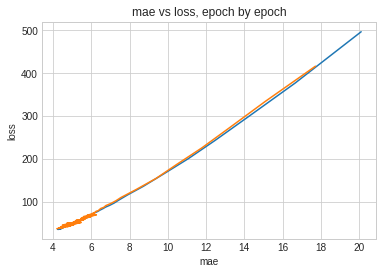

In [10]:
make_plot(histories_per_fold)

As you can see regularization certainly helped. But in the first question it had caused much more difference.

In [11]:

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
histories_per_fold = []
# split training and validation sets
for i, (train, test) in enumerate(kfold.split(X, Y)):
    print("Fold no:{}".format(i))
    X_train = X[train]
    X_test = X[test]
    Y_test = (Y[test])
    Y_train = (Y[train])
        
    # make the model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(6, kernel_initializer='normal', activation='relu',  kernel_regularizer=l2(0.01)))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_percentage_error', optimizer='rmsprop', metrics=['mae'])

    
    # Train the model
    history = model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=1, validation_data=(X_test,Y_test))
    histories_per_fold.append(history)
    

Fold no:0
Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 1s 2ms/step - loss: 100.6845 - mean_absolute_error: 22.5446 - val_loss: 92.8774 - val_mean_absolute_error: 21.0799
Epoch 2/100
404/404 [==============================] - 0s 64us/step - loss: 89.8688 - mean_absolute_error: 20.6693 - val_loss: 83.9943 - val_mean_absolute_error: 19.5283
Epoch 3/100
404/404 [==============================] - 0s 64us/step - loss: 80.9578 - mean_absolute_error: 19.0373 - val_loss: 73.9437 - val_mean_absolute_error: 17.6990
Epoch 4/100
404/404 [==============================] - 0s 55us/step - loss: 71.1117 - mean_absolute_error: 17.1527 - val_loss: 64.9851 - val_mean_absolute_error: 15.8382
Epoch 5/100
404/404 [==============================] - 0s 47us/step - loss: 61.6328 - mean_absolute_error: 15.2204 - val_loss: 57.1036 - val_mean_absolute_error: 13.9779
Epoch 6/100
404/404 [==============================] - 0s 48us/step - loss: 53.4506 - mean_abs

404/404 [==============================] - 0s 51us/step - loss: 20.6498 - mean_absolute_error: 5.0180 - val_loss: 24.2708 - val_mean_absolute_error: 5.4915
Epoch 50/100
404/404 [==============================] - 0s 51us/step - loss: 20.9414 - mean_absolute_error: 5.0678 - val_loss: 24.0525 - val_mean_absolute_error: 5.4598
Epoch 51/100
404/404 [==============================] - 0s 45us/step - loss: 20.4330 - mean_absolute_error: 4.9705 - val_loss: 25.1803 - val_mean_absolute_error: 5.5113
Epoch 52/100
404/404 [==============================] - 0s 54us/step - loss: 20.4483 - mean_absolute_error: 4.9080 - val_loss: 23.9898 - val_mean_absolute_error: 5.4457
Epoch 53/100
404/404 [==============================] - 0s 51us/step - loss: 20.2875 - mean_absolute_error: 4.9162 - val_loss: 24.0453 - val_mean_absolute_error: 6.0161
Epoch 54/100
404/404 [==============================] - 0s 53us/step - loss: 20.4635 - mean_absolute_error: 5.0019 - val_loss: 24.1965 - val_mean_absolute_error: 5.4275

404/404 [==============================] - 0s 46us/step - loss: 18.4986 - mean_absolute_error: 4.6287 - val_loss: 23.9834 - val_mean_absolute_error: 5.2149
Epoch 98/100
404/404 [==============================] - 0s 52us/step - loss: 18.6786 - mean_absolute_error: 4.6356 - val_loss: 23.0082 - val_mean_absolute_error: 5.1137
Epoch 99/100
404/404 [==============================] - 0s 51us/step - loss: 18.5359 - mean_absolute_error: 4.6612 - val_loss: 21.5939 - val_mean_absolute_error: 5.0523
Epoch 100/100
404/404 [==============================] - 0s 53us/step - loss: 18.4189 - mean_absolute_error: 4.5986 - val_loss: 23.5367 - val_mean_absolute_error: 5.1343
Fold no:1
Train on 405 samples, validate on 101 samples
Epoch 1/100
405/405 [==============================] - 1s 2ms/step - loss: 82.1853 - mean_absolute_error: 19.9406 - val_loss: 64.1671 - val_mean_absolute_error: 14.9822
Epoch 2/100
405/405 [==============================] - 0s 57us/step - loss: 62.2127 - mean_absolute_error: 15.4

405/405 [==============================] - 0s 52us/step - loss: 21.7466 - mean_absolute_error: 5.3317 - val_loss: 22.1806 - val_mean_absolute_error: 4.5797
Epoch 46/100
405/405 [==============================] - 0s 58us/step - loss: 21.9818 - mean_absolute_error: 5.2523 - val_loss: 19.4406 - val_mean_absolute_error: 4.2582
Epoch 47/100
405/405 [==============================] - 0s 55us/step - loss: 21.6447 - mean_absolute_error: 5.2715 - val_loss: 18.8068 - val_mean_absolute_error: 4.2767
Epoch 48/100
405/405 [==============================] - 0s 51us/step - loss: 21.0911 - mean_absolute_error: 5.1666 - val_loss: 18.9388 - val_mean_absolute_error: 4.4689
Epoch 49/100
405/405 [==============================] - 0s 57us/step - loss: 21.4204 - mean_absolute_error: 5.2532 - val_loss: 19.1923 - val_mean_absolute_error: 4.2348
Epoch 50/100
405/405 [==============================] - 0s 52us/step - loss: 21.2429 - mean_absolute_error: 5.1669 - val_loss: 20.5597 - val_mean_absolute_error: 4.9500

405/405 [==============================] - 0s 64us/step - loss: 18.7361 - mean_absolute_error: 4.7556 - val_loss: 17.7502 - val_mean_absolute_error: 4.1885
Epoch 94/100
405/405 [==============================] - 0s 75us/step - loss: 18.8583 - mean_absolute_error: 4.7799 - val_loss: 17.8653 - val_mean_absolute_error: 4.2233
Epoch 95/100
405/405 [==============================] - 0s 51us/step - loss: 19.9193 - mean_absolute_error: 4.9507 - val_loss: 19.0443 - val_mean_absolute_error: 4.0175
Epoch 96/100
405/405 [==============================] - 0s 84us/step - loss: 19.7985 - mean_absolute_error: 4.8858 - val_loss: 21.1805 - val_mean_absolute_error: 5.0337
Epoch 97/100
405/405 [==============================] - 0s 79us/step - loss: 19.4156 - mean_absolute_error: 4.8981 - val_loss: 21.0550 - val_mean_absolute_error: 4.9987
Epoch 98/100
405/405 [==============================] - 0s 54us/step - loss: 19.1733 - mean_absolute_error: 4.8475 - val_loss: 17.1891 - val_mean_absolute_error: 4.0402

405/405 [==============================] - 0s 55us/step - loss: 23.1030 - mean_absolute_error: 5.3445 - val_loss: 28.0978 - val_mean_absolute_error: 5.3121
Epoch 42/100
405/405 [==============================] - 0s 51us/step - loss: 23.3491 - mean_absolute_error: 5.3977 - val_loss: 25.6332 - val_mean_absolute_error: 5.2813
Epoch 43/100
405/405 [==============================] - 0s 57us/step - loss: 22.3342 - mean_absolute_error: 5.2666 - val_loss: 25.0399 - val_mean_absolute_error: 5.3989
Epoch 44/100
405/405 [==============================] - 0s 49us/step - loss: 22.1824 - mean_absolute_error: 5.3454 - val_loss: 24.5927 - val_mean_absolute_error: 5.3397
Epoch 45/100
405/405 [==============================] - 0s 62us/step - loss: 22.1368 - mean_absolute_error: 5.3267 - val_loss: 24.5650 - val_mean_absolute_error: 5.4688
Epoch 46/100
405/405 [==============================] - 0s 77us/step - loss: 22.0419 - mean_absolute_error: 5.2889 - val_loss: 24.9538 - val_mean_absolute_error: 5.0912

405/405 [==============================] - 0s 52us/step - loss: 19.0706 - mean_absolute_error: 4.7305 - val_loss: 20.6668 - val_mean_absolute_error: 5.1518
Epoch 90/100
405/405 [==============================] - 0s 51us/step - loss: 18.7663 - mean_absolute_error: 4.6957 - val_loss: 19.7462 - val_mean_absolute_error: 4.7198
Epoch 91/100
405/405 [==============================] - 0s 58us/step - loss: 19.4189 - mean_absolute_error: 4.7951 - val_loss: 20.9235 - val_mean_absolute_error: 5.2044
Epoch 92/100
405/405 [==============================] - 0s 51us/step - loss: 19.2451 - mean_absolute_error: 4.8108 - val_loss: 20.0031 - val_mean_absolute_error: 4.7205
Epoch 93/100
405/405 [==============================] - 0s 54us/step - loss: 18.9652 - mean_absolute_error: 4.7564 - val_loss: 19.7503 - val_mean_absolute_error: 4.7871
Epoch 94/100
405/405 [==============================] - 0s 59us/step - loss: 19.1405 - mean_absolute_error: 4.7771 - val_loss: 20.0623 - val_mean_absolute_error: 4.6846

405/405 [==============================] - 0s 62us/step - loss: 21.7508 - mean_absolute_error: 5.2071 - val_loss: 20.4227 - val_mean_absolute_error: 5.2497
Epoch 38/100
405/405 [==============================] - 0s 58us/step - loss: 21.2137 - mean_absolute_error: 5.2323 - val_loss: 19.9444 - val_mean_absolute_error: 5.0157
Epoch 39/100
405/405 [==============================] - 0s 62us/step - loss: 21.5285 - mean_absolute_error: 5.2669 - val_loss: 21.7527 - val_mean_absolute_error: 4.8413
Epoch 40/100
405/405 [==============================] - 0s 55us/step - loss: 21.3849 - mean_absolute_error: 5.1211 - val_loss: 19.6301 - val_mean_absolute_error: 4.7342
Epoch 41/100
405/405 [==============================] - 0s 51us/step - loss: 21.0457 - mean_absolute_error: 5.0090 - val_loss: 19.9319 - val_mean_absolute_error: 5.0384
Epoch 42/100
405/405 [==============================] - 0s 46us/step - loss: 21.1527 - mean_absolute_error: 5.1674 - val_loss: 22.8918 - val_mean_absolute_error: 5.7303

405/405 [==============================] - 0s 58us/step - loss: 19.1382 - mean_absolute_error: 4.7479 - val_loss: 19.1240 - val_mean_absolute_error: 4.4695
Epoch 86/100
405/405 [==============================] - 0s 63us/step - loss: 18.5658 - mean_absolute_error: 4.6091 - val_loss: 18.8690 - val_mean_absolute_error: 4.5027
Epoch 87/100
405/405 [==============================] - 0s 63us/step - loss: 18.8725 - mean_absolute_error: 4.6817 - val_loss: 18.6576 - val_mean_absolute_error: 4.5230
Epoch 88/100
405/405 [==============================] - 0s 66us/step - loss: 19.0324 - mean_absolute_error: 4.7438 - val_loss: 18.7295 - val_mean_absolute_error: 4.6709
Epoch 89/100
405/405 [==============================] - 0s 60us/step - loss: 18.2754 - mean_absolute_error: 4.5987 - val_loss: 18.6413 - val_mean_absolute_error: 4.6417
Epoch 90/100
405/405 [==============================] - 0s 60us/step - loss: 18.4534 - mean_absolute_error: 4.6238 - val_loss: 18.3469 - val_mean_absolute_error: 4.5488

405/405 [==============================] - 0s 61us/step - loss: 23.0265 - mean_absolute_error: 5.2738 - val_loss: 21.7141 - val_mean_absolute_error: 6.1317
Epoch 34/100
405/405 [==============================] - 0s 59us/step - loss: 22.7054 - mean_absolute_error: 5.2692 - val_loss: 21.0324 - val_mean_absolute_error: 5.8202
Epoch 35/100
405/405 [==============================] - 0s 52us/step - loss: 22.1931 - mean_absolute_error: 5.1036 - val_loss: 23.9101 - val_mean_absolute_error: 6.8469
Epoch 36/100
405/405 [==============================] - 0s 55us/step - loss: 22.9526 - mean_absolute_error: 5.3407 - val_loss: 21.2014 - val_mean_absolute_error: 5.9827
Epoch 37/100
405/405 [==============================] - 0s 59us/step - loss: 22.1662 - mean_absolute_error: 5.1824 - val_loss: 20.6698 - val_mean_absolute_error: 5.6182
Epoch 38/100
405/405 [==============================] - 0s 49us/step - loss: 21.9943 - mean_absolute_error: 5.1339 - val_loss: 21.1559 - val_mean_absolute_error: 5.9314

405/405 [==============================] - 0s 53us/step - loss: 19.4111 - mean_absolute_error: 4.6968 - val_loss: 18.3874 - val_mean_absolute_error: 5.2627
Epoch 82/100
405/405 [==============================] - 0s 85us/step - loss: 19.3769 - mean_absolute_error: 4.6936 - val_loss: 18.7008 - val_mean_absolute_error: 5.1953
Epoch 83/100
405/405 [==============================] - 0s 53us/step - loss: 19.1130 - mean_absolute_error: 4.6740 - val_loss: 19.2772 - val_mean_absolute_error: 5.1048
Epoch 84/100
405/405 [==============================] - 0s 55us/step - loss: 20.4101 - mean_absolute_error: 4.8349 - val_loss: 19.0461 - val_mean_absolute_error: 5.0877
Epoch 85/100
405/405 [==============================] - 0s 75us/step - loss: 19.9127 - mean_absolute_error: 4.7163 - val_loss: 18.3218 - val_mean_absolute_error: 5.1290
Epoch 86/100
405/405 [==============================] - 0s 47us/step - loss: 19.1365 - mean_absolute_error: 4.6277 - val_loss: 18.8003 - val_mean_absolute_error: 5.4421

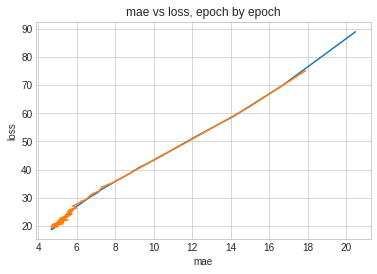

In [12]:
make_plot(histories_per_fold)

In [13]:

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
histories_per_fold = []
# split training and validation sets
for i, (train, test) in enumerate(kfold.split(X, Y)):
    print("Fold no:{}".format(i))
    X_train = X[train]
    X_test = X[test]
    Y_test = (Y[test])
    Y_train = (Y[train])
        
    # make the model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(6, kernel_initializer='normal', activation='relu',  kernel_regularizer=l2(0.01)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_logarithmic_error', optimizer='rmsprop', metrics=['mae'])

    
    # Train the model
    history = model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=1, validation_data=(X_test,Y_test))
    histories_per_fold.append(history)
    

Fold no:0
Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 1s 2ms/step - loss: 1.5145 - mean_absolute_error: 16.4905 - val_loss: 0.9632 - val_mean_absolute_error: 14.5028
Epoch 2/100
404/404 [==============================] - 0s 63us/step - loss: 0.8104 - mean_absolute_error: 13.6219 - val_loss: 0.5674 - val_mean_absolute_error: 12.0918
Epoch 3/100
404/404 [==============================] - 0s 59us/step - loss: 0.4900 - mean_absolute_error: 11.4367 - val_loss: 0.3825 - val_mean_absolute_error: 10.3410
Epoch 4/100
404/404 [==============================] - 0s 59us/step - loss: 0.2964 - mean_absolute_error: 9.3246 - val_loss: 0.2394 - val_mean_absolute_error: 8.0824
Epoch 5/100
404/404 [==============================] - 0s 54us/step - loss: 0.2143 - mean_absolute_error: 8.1126 - val_loss: 0.2128 - val_mean_absolute_error: 7.5825
Epoch 6/100
404/404 [==============================] - 0s 54us/step - loss: 0.1904 - mean_absolute_error: 7.6

Epoch 50/100
404/404 [==============================] - 0s 63us/step - loss: 0.0874 - mean_absolute_error: 4.9551 - val_loss: 0.1130 - val_mean_absolute_error: 5.7173
Epoch 51/100
404/404 [==============================] - 0s 58us/step - loss: 0.0840 - mean_absolute_error: 4.8623 - val_loss: 0.1115 - val_mean_absolute_error: 5.3923
Epoch 52/100
404/404 [==============================] - 0s 59us/step - loss: 0.0890 - mean_absolute_error: 5.0086 - val_loss: 0.1098 - val_mean_absolute_error: 5.4179
Epoch 53/100
404/404 [==============================] - 0s 58us/step - loss: 0.0875 - mean_absolute_error: 4.9532 - val_loss: 0.1123 - val_mean_absolute_error: 5.3792
Epoch 54/100
404/404 [==============================] - 0s 60us/step - loss: 0.0860 - mean_absolute_error: 4.8221 - val_loss: 0.1116 - val_mean_absolute_error: 5.6725
Epoch 55/100
404/404 [==============================] - 0s 57us/step - loss: 0.0852 - mean_absolute_error: 4.9052 - val_loss: 0.1085 - val_mean_absolute_error: 5.384

404/404 [==============================] - 0s 58us/step - loss: 0.0734 - mean_absolute_error: 4.5471 - val_loss: 0.0958 - val_mean_absolute_error: 4.9598
Epoch 100/100
404/404 [==============================] - 0s 61us/step - loss: 0.0719 - mean_absolute_error: 4.4612 - val_loss: 0.0965 - val_mean_absolute_error: 4.9819
Fold no:1
Train on 405 samples, validate on 101 samples
Epoch 1/100
405/405 [==============================] - 1s 2ms/step - loss: 7.3455 - mean_absolute_error: 23.0466 - val_loss: 2.7797 - val_mean_absolute_error: 18.1207
Epoch 2/100
405/405 [==============================] - 0s 67us/step - loss: 2.7190 - mean_absolute_error: 19.0703 - val_loss: 2.0306 - val_mean_absolute_error: 16.8988
Epoch 3/100
405/405 [==============================] - 0s 63us/step - loss: 2.0778 - mean_absolute_error: 17.9473 - val_loss: 1.5660 - val_mean_absolute_error: 15.7862
Epoch 4/100
405/405 [==============================] - 0s 59us/step - loss: 1.6318 - mean_absolute_error: 16.8859 - val

Epoch 48/100
405/405 [==============================] - 0s 107us/step - loss: 0.0963 - mean_absolute_error: 5.2428 - val_loss: 0.0906 - val_mean_absolute_error: 4.7846
Epoch 49/100
405/405 [==============================] - 0s 129us/step - loss: 0.0985 - mean_absolute_error: 5.2707 - val_loss: 0.0911 - val_mean_absolute_error: 4.8195
Epoch 50/100
405/405 [==============================] - 0s 105us/step - loss: 0.1026 - mean_absolute_error: 5.3859 - val_loss: 0.0918 - val_mean_absolute_error: 4.8799
Epoch 51/100
405/405 [==============================] - 0s 95us/step - loss: 0.0978 - mean_absolute_error: 5.3398 - val_loss: 0.0894 - val_mean_absolute_error: 4.6310
Epoch 52/100
405/405 [==============================] - 0s 184us/step - loss: 0.0954 - mean_absolute_error: 5.1981 - val_loss: 0.0979 - val_mean_absolute_error: 5.3544
Epoch 53/100
405/405 [==============================] - 0s 189us/step - loss: 0.0980 - mean_absolute_error: 5.3076 - val_loss: 0.0906 - val_mean_absolute_error: 

405/405 [==============================] - 0s 68us/step - loss: 0.0829 - mean_absolute_error: 4.7645 - val_loss: 0.0822 - val_mean_absolute_error: 4.0178
Epoch 98/100
405/405 [==============================] - 0s 79us/step - loss: 0.0773 - mean_absolute_error: 4.5513 - val_loss: 0.0818 - val_mean_absolute_error: 4.4171
Epoch 99/100
405/405 [==============================] - 0s 63us/step - loss: 0.0871 - mean_absolute_error: 4.9344 - val_loss: 0.0791 - val_mean_absolute_error: 4.1079
Epoch 100/100
405/405 [==============================] - 0s 70us/step - loss: 0.0800 - mean_absolute_error: 4.6821 - val_loss: 0.0886 - val_mean_absolute_error: 4.0800
Fold no:2
Train on 405 samples, validate on 101 samples
Epoch 1/100
405/405 [==============================] - 1s 2ms/step - loss: 9.7341 - mean_absolute_error: 27.9979 - val_loss: 9.4338 - val_mean_absolute_error: 26.2389
Epoch 2/100
405/405 [==============================] - 0s 68us/step - loss: 9.7326 - mean_absolute_error: 26.2893 - val_l

405/405 [==============================] - 0s 55us/step - loss: 0.1342 - mean_absolute_error: 6.0976 - val_loss: 0.1854 - val_mean_absolute_error: 6.9482
Epoch 46/100
405/405 [==============================] - 0s 52us/step - loss: 0.1360 - mean_absolute_error: 6.2042 - val_loss: 0.1892 - val_mean_absolute_error: 7.0572
Epoch 47/100
405/405 [==============================] - 0s 53us/step - loss: 0.1341 - mean_absolute_error: 6.1954 - val_loss: 0.1622 - val_mean_absolute_error: 6.1738
Epoch 48/100
405/405 [==============================] - 0s 57us/step - loss: 0.1303 - mean_absolute_error: 5.9845 - val_loss: 0.1634 - val_mean_absolute_error: 6.2155
Epoch 49/100
405/405 [==============================] - 0s 56us/step - loss: 0.1294 - mean_absolute_error: 5.9689 - val_loss: 0.1673 - val_mean_absolute_error: 6.4024
Epoch 50/100
405/405 [==============================] - 0s 70us/step - loss: 0.1300 - mean_absolute_error: 5.9413 - val_loss: 0.1550 - val_mean_absolute_error: 5.9373
Epoch 51/10

405/405 [==============================] - 0s 57us/step - loss: 0.0922 - mean_absolute_error: 5.0515 - val_loss: 0.0982 - val_mean_absolute_error: 4.9796
Epoch 95/100
405/405 [==============================] - 0s 49us/step - loss: 0.0877 - mean_absolute_error: 4.8749 - val_loss: 0.0980 - val_mean_absolute_error: 4.9415
Epoch 96/100
405/405 [==============================] - 0s 53us/step - loss: 0.0935 - mean_absolute_error: 5.0566 - val_loss: 0.1079 - val_mean_absolute_error: 5.2864
Epoch 97/100
405/405 [==============================] - 0s 50us/step - loss: 0.0905 - mean_absolute_error: 4.9725 - val_loss: 0.1069 - val_mean_absolute_error: 5.2590
Epoch 98/100
405/405 [==============================] - 0s 53us/step - loss: 0.0870 - mean_absolute_error: 4.9085 - val_loss: 0.1127 - val_mean_absolute_error: 5.4884
Epoch 99/100
405/405 [==============================] - 0s 54us/step - loss: 0.0916 - mean_absolute_error: 5.1280 - val_loss: 0.1040 - val_mean_absolute_error: 5.2167
Epoch 100/1

Epoch 43/100
405/405 [==============================] - 0s 55us/step - loss: 0.0905 - mean_absolute_error: 4.9690 - val_loss: 0.0834 - val_mean_absolute_error: 4.7446
Epoch 44/100
405/405 [==============================] - 0s 57us/step - loss: 0.0954 - mean_absolute_error: 5.1550 - val_loss: 0.0748 - val_mean_absolute_error: 4.8720
Epoch 45/100
405/405 [==============================] - 0s 57us/step - loss: 0.0935 - mean_absolute_error: 5.0613 - val_loss: 0.0741 - val_mean_absolute_error: 4.8108
Epoch 46/100
405/405 [==============================] - 0s 65us/step - loss: 0.0897 - mean_absolute_error: 4.9429 - val_loss: 0.0853 - val_mean_absolute_error: 4.7701
Epoch 47/100
405/405 [==============================] - 0s 53us/step - loss: 0.1003 - mean_absolute_error: 5.0833 - val_loss: 0.0776 - val_mean_absolute_error: 5.0406
Epoch 48/100
405/405 [==============================] - 0s 75us/step - loss: 0.0937 - mean_absolute_error: 4.9939 - val_loss: 0.0719 - val_mean_absolute_error: 4.743

405/405 [==============================] - 0s 55us/step - loss: 0.0758 - mean_absolute_error: 4.5323 - val_loss: 0.0712 - val_mean_absolute_error: 4.3824
Epoch 93/100
405/405 [==============================] - 0s 53us/step - loss: 0.0858 - mean_absolute_error: 4.8384 - val_loss: 0.0953 - val_mean_absolute_error: 5.7159
Epoch 94/100
405/405 [==============================] - 0s 58us/step - loss: 0.0779 - mean_absolute_error: 4.5953 - val_loss: 0.0737 - val_mean_absolute_error: 4.7983
Epoch 95/100
405/405 [==============================] - 0s 54us/step - loss: 0.0761 - mean_absolute_error: 4.4584 - val_loss: 0.0999 - val_mean_absolute_error: 5.9060
Epoch 96/100
405/405 [==============================] - 0s 55us/step - loss: 0.0791 - mean_absolute_error: 4.5621 - val_loss: 0.0705 - val_mean_absolute_error: 4.3813
Epoch 97/100
405/405 [==============================] - 0s 55us/step - loss: 0.0732 - mean_absolute_error: 4.3148 - val_loss: 0.0679 - val_mean_absolute_error: 4.4697
Epoch 98/10

Epoch 41/100
405/405 [==============================] - 0s 68us/step - loss: 0.0980 - mean_absolute_error: 4.9988 - val_loss: 0.0849 - val_mean_absolute_error: 5.3987
Epoch 42/100
405/405 [==============================] - 0s 73us/step - loss: 0.0982 - mean_absolute_error: 5.0554 - val_loss: 0.0847 - val_mean_absolute_error: 5.3361
Epoch 43/100
405/405 [==============================] - 0s 61us/step - loss: 0.0990 - mean_absolute_error: 5.0672 - val_loss: 0.0884 - val_mean_absolute_error: 5.5582
Epoch 44/100
405/405 [==============================] - 0s 68us/step - loss: 0.0981 - mean_absolute_error: 5.0211 - val_loss: 0.1048 - val_mean_absolute_error: 5.7750
Epoch 45/100
405/405 [==============================] - 0s 58us/step - loss: 0.0971 - mean_absolute_error: 5.0068 - val_loss: 0.0862 - val_mean_absolute_error: 5.4723
Epoch 46/100
405/405 [==============================] - 0s 65us/step - loss: 0.0975 - mean_absolute_error: 5.0357 - val_loss: 0.0874 - val_mean_absolute_error: 5.317

Epoch 90/100
405/405 [==============================] - 0s 131us/step - loss: 0.0888 - mean_absolute_error: 4.7079 - val_loss: 0.0758 - val_mean_absolute_error: 4.9356
Epoch 91/100
405/405 [==============================] - 0s 110us/step - loss: 0.0858 - mean_absolute_error: 4.6727 - val_loss: 0.0745 - val_mean_absolute_error: 4.8560
Epoch 92/100
405/405 [==============================] - 0s 60us/step - loss: 0.0857 - mean_absolute_error: 4.6597 - val_loss: 0.0742 - val_mean_absolute_error: 4.8195
Epoch 93/100
405/405 [==============================] - 0s 114us/step - loss: 0.0840 - mean_absolute_error: 4.6633 - val_loss: 0.0735 - val_mean_absolute_error: 4.7585
Epoch 94/100
405/405 [==============================] - 0s 99us/step - loss: 0.0806 - mean_absolute_error: 4.5328 - val_loss: 0.1100 - val_mean_absolute_error: 5.7044
Epoch 95/100
405/405 [==============================] - 0s 61us/step - loss: 0.0887 - mean_absolute_error: 4.8282 - val_loss: 0.0736 - val_mean_absolute_error: 4.

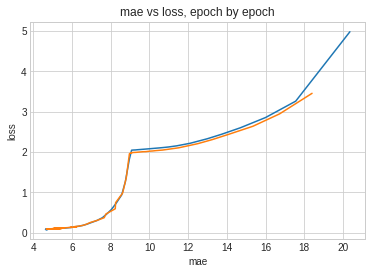

In [14]:
make_plot(histories_per_fold)

Mean square error is quite suitable for regression, I also tried mean_absolute_percentage_error 
and mean_squared_logarithmic_error. Neither one beats it in the final results. As far as I can say choosing right
loss mostly about knowing your problem. Is it classificaiton or regression? How many labels are there etc.